# SLTimer Tutorial of TDC2 Data

This notebook shows you how to find the estimation of a lens time delay from TDC2 light curve data using the `PyCS` code. For a detailed tutorial through the `PyCS` code, please visit this [address.](https://github.com/DarkEnergyScienceCollaboration/SLTimer/blob/master/notebooks/PyCS_Tutorial.ipynb)

First, we'll import `SLTimer`, as well as a few other important commands. 

In [9]:
from __future__ import print_function
%matplotlib inline

import sys
sys.path.append('../python')
import desc.sltimer

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Next, let's simplify our variable. 

In [10]:
timer = desc.sltimer.SLTimer()

Let's define our variables and download our trial data, testing it to make sure that we have downloaded the correct file. The output should state 194 lines if using the trialcurves.txt file. 

In [14]:
url = "http://www.slac.stanford.edu/~pjm/LSST/DESC/SLTimeDelayChallenge/release/tdc2/gateway/tdc2-gateway-example.txt"
timer.download(url, and_read=True, format='tdc2')

Downloaded datafile: http://www.slac.stanford.edu/~pjm/LSST/DESC/SLTimeDelayChallenge/release/tdc2/gateway/tdc2-gateway-example.txt
Checking header of "tdc2-gateway-example.txt"...
Reading "tdc2-gateway-example.txt"...
('m_upper, m_lower, merr = ', 21.242373001127294, 21.199108911204284, 0.021632044961505059)
('m_upper, m_lower, merr = ', 21.144443197772862, 21.142370379642387, 0.00103640906523772)
('m_upper, m_lower, merr = ', 20.991722182471072, 20.96008806686568, 0.015817057802696155)
('m_upper, m_lower, merr = ', 20.465919115762361, 20.444264264472032, 0.010827425645164368)
('m_upper, m_lower, merr = ', 20.953060386090041, 20.942745710590053, 0.0051573377499938289)
('m_upper, m_lower, merr = ', 21.180161956898356, 21.167111562675217, 0.006525197111569625)
('m_upper, m_lower, merr = ', 20.934416056618108, 20.923803184493408, 0.0053064360623498175)
('m_upper, m_lower, merr = ', 20.744656347141404, 20.731112880532756, 0.0067717333043244565)
('m_upper, m_lower, merr = ', 20.71901138221

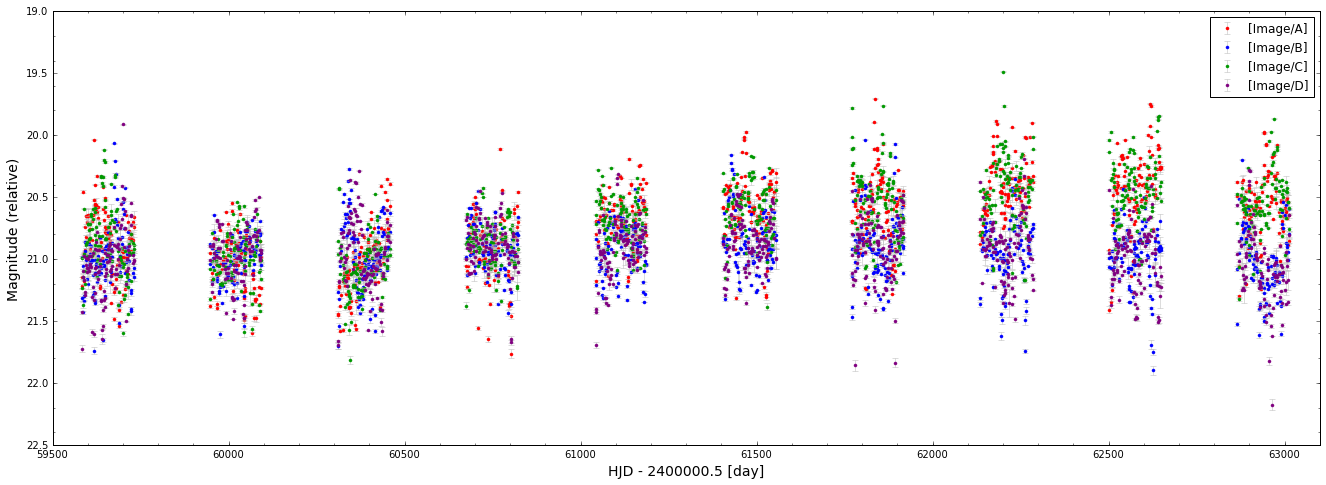

In [15]:
timer.display_light_curves(jdrange=(59500,63100))

These lines will run an entire free-knot spline technique on your data with a complete error analysis using the `TDC2` method. Below, you can specify how the time delays will be analyzed. The default is listed below according to the `PyCS` tutorial. See the bottom of the page for alternate methods. 

In [16]:
timer.estimate_time_delays(method='pycs',microlensing='spline',agn='spline',error=None)

You are using the pycs method.
Starting opt_rough on initial delays :
AB   +0.00 | AC   +0.00 | AD   +0.00 | BC   +0.00 | BD   +0.00 | CD   +0.00
Aiming at first curve.
Starting ML optimization ...
Working on the spline ML of [Image/A]|~3/u/21~|
Working on the spline ML of [Image/B](0.000,-0.257,0)|~3/u/21~|
Working on the spline ML of [Image/C](0.000,-0.015,0)|~3/u/21~|
Working on the spline ML of [Image/D](0.000,-0.253,0)|~3/u/21~|
Done !
First spline and ML opt done.
AB   +6.00 | AC   +2.00 | AD   +1.00 | BC   -4.00 | BD   -5.00 | CD   -1.00    (Iteration  1, r2 = 46865557.4)
AB  +10.00 | AC   +4.00 | AD   +3.00 | BC   -6.00 | BD   -7.00 | CD   -1.00    (Iteration  2, r2 = 45901911.7)
AB  +12.00 | AC   +5.00 | AD   +4.00 | BC   -7.00 | BD   -8.00 | CD   -1.00    (Iteration  3, r2 = 45588822.5)
AB  +14.00 | AC   +6.00 | AD   +5.00 | BC   -8.00 | BD   -9.00 | CD   -1.00    (Iteration  4, r2 = 45343841.8)
AB  +16.00 | AC   +7.00 | AD   +6.00 | BC   -9.00 | BD  -10.00 | CD   -1.00    (I

In [17]:
timer.report_time_delays()

Time Delays:
AB  +23.61
AC  +10.62
AD   +4.91
BC  -12.99
BD  -18.70
CD   -5.71


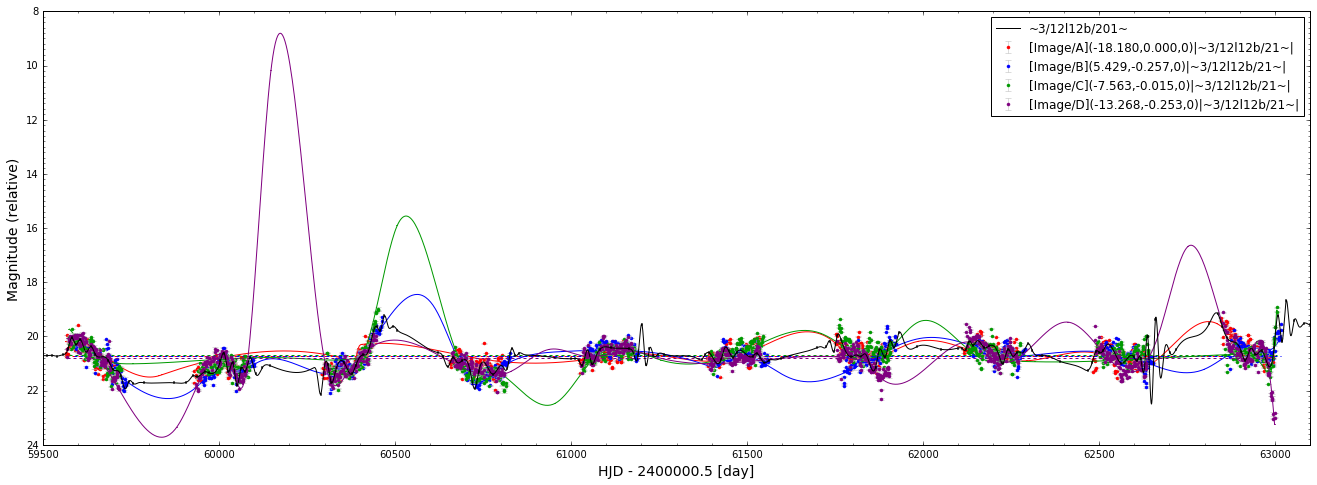

In [18]:
timer.display_light_curves(jdrange=(59500,63100))

The old files have been deleted.
('Making', 4, 'copies of the original dataset:')
Now thowing dice into sims_copies ...
Input shifts :
A   -18.18 | B    +5.43 | C    -7.56 | D   -13.27
Input delays :
AB  +23.61 | AC  +10.62 | AD   +4.91 | BC  -12.99 | BD  -18.70 | CD   -5.71
Preparing 1 identical copies for pkl 1/4 ...
Wrote sims_copies/1_1467914852.22275.pkl
Preparing 1 identical copies for pkl 2/4 ...
Wrote sims_copies/2_1467914852.26945.pkl
Preparing 1 identical copies for pkl 3/4 ...
Wrote sims_copies/3_1467914852.29718.pkl
Preparing 1 identical copies for pkl 4/4 ...
Wrote sims_copies/4_1467914852.32513.pkl
('Making', 4, 'synthetic datasets, varying time delays by +/-', 4.0, 'days')
Now thowing dice into sims_mocks ...
Input shifts :
A   -18.18 | B    +5.43 | C    -7.56 | D   -13.27
Input delays :
AB  +23.61 | AC  +10.62 | AD   +4.91 | BC  -12.99 | BD  -18.70 | CD   -5.71
Drawing 1 simulations for pkl 1/4 ...
Wrote sims_mocks/1_1467914852.37099.pkl
Drawing 1 simulations for pkl 2/

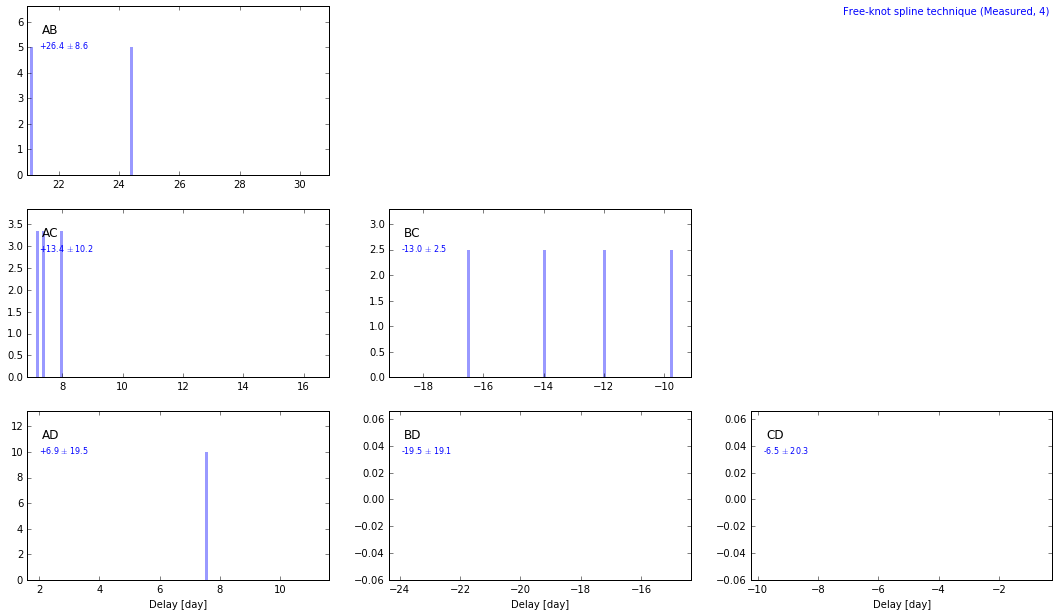

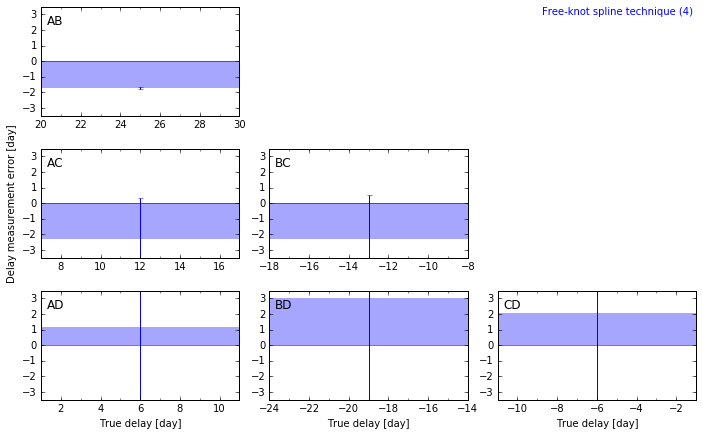

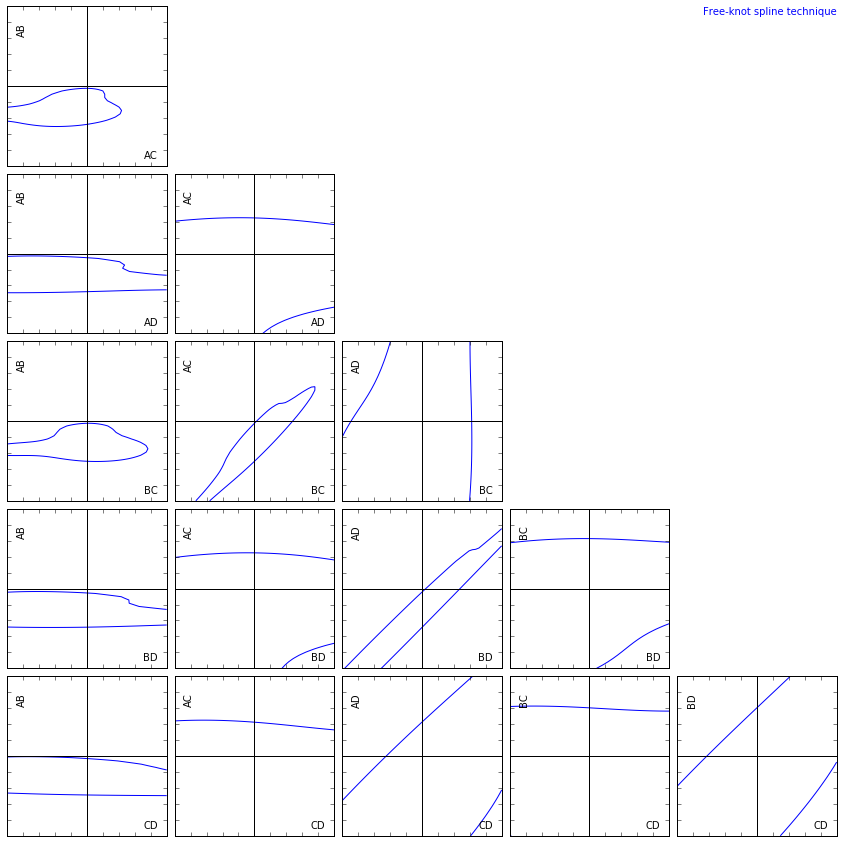

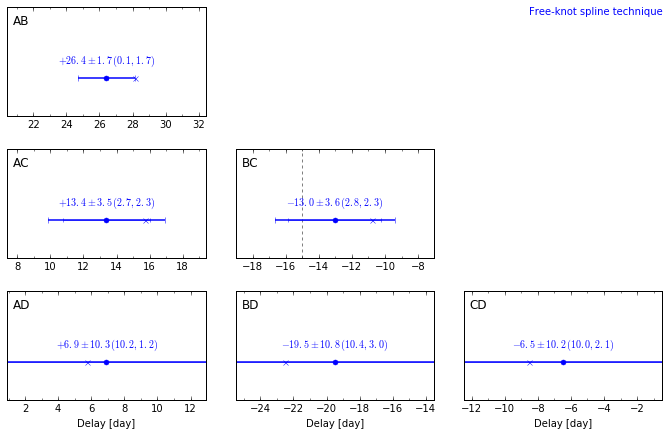

In [19]:
timer.estimate_uncertainties(n=1,npkl=4)